<a href="https://colab.research.google.com/github/alifele/EEG-computation/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mat4py
import numpy as np
import matplotlib.pyplot as plt
import mat4py as mt
import os
from IPython.display import Image
from IPython.core.display import HTML 
from itertools import combinations
from numpy.fft import fft
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
!git clone https://github.com/alifele/EEG-computation.git
%cd EEG-computation

Cloning into 'EEG-computation'...
remote: Enumerating objects: 419, done.
remote: Counting objects: 100% (419/419), done.
remote: Compressing objects: 100% (414/414), done.
remote: Total 419 (delta 35), reused 351 (delta 2), pack-reused 0
Receiving objects: 100% (419/419), 582.67 MiB | 39.66 MiB/s, done.
Resolving deltas: 100% (35/35), done.
Checking out files: 100% (345/345), done.
/content/EEG-computation


In [0]:
disorder_dic = []
directory = os.fsencode('EEG Data/disorder')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    disorder_dic.append(np.array(mt.loadmat('EEG Data/disorder/{}'.format(filename))[filename.split('.')[0]]))
    
channels_disorder = [ [] for i in range(len(disorder_dic))]  #channels[person][channel] it will be a numpy array
j=0;
for person in channels_disorder:
    for i in range(19):
        person.append(disorder_dic[j][:,i])
    j+=1
        
normal_dic = []
directory = os.fsencode('EEG Data/normal')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    normal_dic.append(np.array(mt.loadmat('EEG Data/normal/{}'.format(filename))[filename.split('.')[0]]))
    
channels_normal = [ [] for i in range(len(normal_dic))]  #channels[person][channel] it will be a numpy array
j=0;
for person in channels_normal:
    for i in range(19):
        person.append(normal_dic[j][:,i])
    j+=1    
        
data = {"N":channels_normal,
      "D":channels_disorder}

(-4, 256.0)

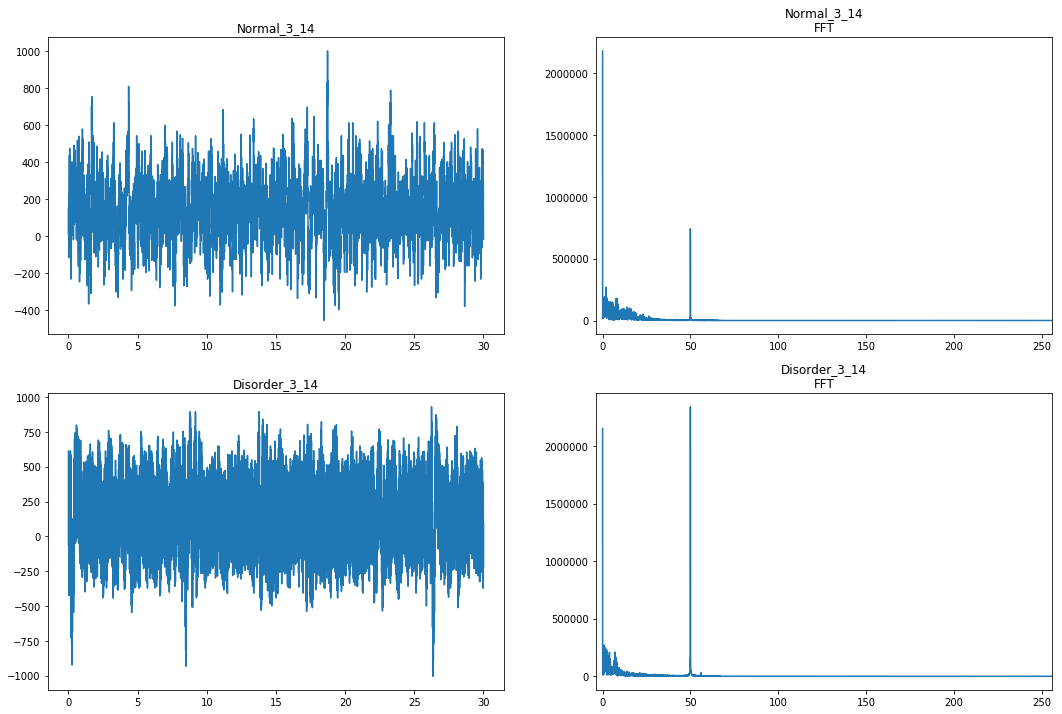

In [4]:
t = np.linspace(0,30,512*30)
f = np.linspace(0,512,512*30)
fig = plt.figure( 'Example Plot', figsize=(18,12))
ax = fig.add_subplot(2,2,1, title = 'Normal_3_14')
ax.plot(t,data["N"][18][16])
ax = fig.add_subplot(2,2,2, title = 'Normal_3_14\nFFT')
ax.plot(f,abs(np.fft.fft(data["N"][18][16])))
ax.set_xlim([-4,512/2])
ax = fig.add_subplot(2,2,3, title = 'Disorder_3_14')
ax.plot(t,data["N"][54][16])
ax = fig.add_subplot(2,2,4, title = 'Disorder_3_14\nFFT')
ax.plot(f,abs(np.fft.fft(data['N'][54][16])))
ax.set_xlim([-4,512/2])


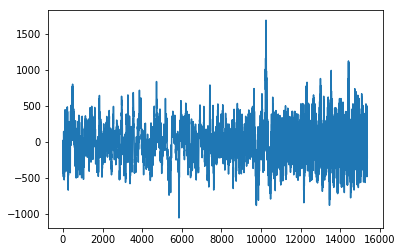

In [5]:
#plt.plot(abs(np.fft.fft(data["N"][18][16]))-abs(np.fft.fft(data["N"][5][16])))
plt.plot(data['N'][8][16] - data['N'][52][16])

In [6]:
n_D , n_N = len(data['D']), len(data['N'])
n_D, n_N

(196, 132)

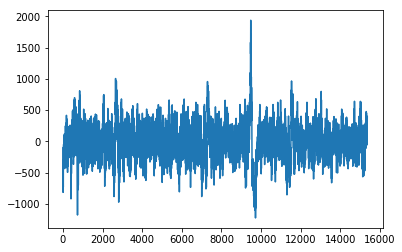

In [7]:
plt.plot(data['N'][4][4] - data['N'][24][4])

In [0]:
def New_Data_Generator_N():
    number_of_samples =  30
    randlist = (132 * np.random.random(number_of_samples)).astype(int)
    new_patients = list(data['N'][i] for i in randlist)
    
    index = [ i for i in range(number_of_samples)]
    comb = list( combinations(index, 2))
    new_data = [[] for i in range(len(comb))]
    person = 0
    for x,y in comb:
        for chan in range(19):
            new_data[person].append((new_patients[x][chan] + new_patients[y][chan] )/2)
        data['N'].append(new_data[person])
        person += 1

    
def New_Data_Generator_D():
    number_of_samples = 30
    randlist = (132 * np.random.random(number_of_samples)).astype(int)
    new_patients = list(data['D'][i] for i in randlist)
    
    index = [ i for i in range(number_of_samples)]
    comb = list( combinations(index, 2))
    new_data = [[] for i in range(len(comb))]
    person = 0
    for x,y in comb:
        for chan in range(19):
            new_data[person].append((new_patients[x][chan] + new_patients[y][chan] )/2)
        data['D'].append(new_data[person])
        person += 1

In [0]:


New_Data_Generator_N()
New_Data_Generator_D()

In [10]:

n_D , n_N = len(data['D']), len(data['N'])
n_D, n_N




(631, 567)

In [0]:
FT_matrix_N = np.array(data['N'])
FT_matrix_D = np.array(data['D'])

temp_D = FT_matrix_D.reshape((FT_matrix_D.shape[0],FT_matrix_D.shape[2],FT_matrix_D.shape[1]))
temp_N = FT_matrix_N.reshape((FT_matrix_N.shape[0],FT_matrix_N.shape[2],FT_matrix_N.shape[1]))
#or d in range(FT_matrix.shape[0]):
scaler = StandardScaler()

In [0]:
for n in range(FT_matrix_N.shape[0]):
  temp_N[n]= scaler.fit_transform(FT_matrix_N[n].T)
  
for d in range(FT_matrix_D.shape[0]):
  temp_D[d]= scaler.fit_transform(FT_matrix_D[d].T)


In [0]:
Data = np.vstack((temp_N, temp_D))
target = np.hstack((np.ones(FT_matrix_N.shape[0]), np.zeros(FT_matrix_D.shape[0])))

In [0]:


X, y = shuffle(Data, target)



In [38]:
temp_D.shape, y.shape


((631, 15360, 19), (1198,))

In [39]:
print(y)

[0. 1. 0. ... 1. 0. 0.]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM


In [0]:
trainX, testX, trainy, testy = train_test_split(X, y)

In [45]:
trainX.shape

(898, 15360, 19)

In [0]:
model = Sequential()
model.add(LSTM(18, return_sequences=False, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.5))
#model.add(LSTM(100)) dramatically worse results
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 18)                2736      
_________________________________________________________________
dropout_5 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                190       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 2,987
Trainable params: 2,987
Non-trainable params: 0
_________________________________________________________________


In [0]:

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [55]:

model.fit(trainX, trainy, batch_size=256, epochs=50)
score = model.evaluate(testX, testy, batch_size=16)

Epoch 1/50
898/898 [==============================] - 56s 63ms/step - loss: 0.6518 - acc: 0.6002
Epoch 2/50
898/898 [==============================] - 55s 61ms/step - loss: 0.6520 - acc: 0.5891
Epoch 3/50
898/898 [==============================] - 55s 62ms/step - loss: 0.6540 - acc: 0.5913
Epoch 4/50
898/898 [==============================] - 55s 61ms/step - loss: 0.6550 - acc: 0.5924
Epoch 5/50
898/898 [==============================] - 55s 61ms/step - loss: 0.6459 - acc: 0.5980
Epoch 6/50
898/898 [==============================] - 55s 61ms/step - loss: 0.6466 - acc: 0.6125
Epoch 7/50
898/898 [==============================] - 55s 61ms/step - loss: 0.6480 - acc: 0.6047
Epoch 8/50
898/898 [==============================] - 55s 61ms/step - loss: 0.6421 - acc: 0.6013
Epoch 9/50
898/898 [==============================] - 56s 62ms/step - loss: 0.6391 - acc: 0.6303
Epoch 10/50
898/898 [==============================] - 55s 61ms/step - loss: 0.6373 - acc: 0.6102
Epoch 11/50
898/898 [========

In [0]:
|